In [90]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


In [98]:
dataset=pd.read_csv('forestfires.csv')
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [100]:
dataset.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [101]:
dataset['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [102]:
dataset['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [103]:
dataset['month'].replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

In [104]:
dataset['day'].replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)

In [105]:
pd.set_option('display.max_colum',None)

In [106]:
dataset['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [107]:
dataset['size_category'].replace(('small','large'),(0,1),inplace=True)

In [108]:
dataset.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
516,11,2,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [109]:
dataset.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [110]:
dataset.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep','size_category'],axis=1,inplace=True)

In [111]:
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [112]:
print(dataset.describe())

            month         day        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     7.475822    4.259188   90.644681  110.872340  547.940039    9.021663   
std      2.275990    2.072929    5.520111   64.046482  248.066192    4.559477   
min      1.000000    1.000000   18.700000    1.100000    7.900000    0.000000   
25%      7.000000    2.000000   90.200000   68.600000  437.700000    6.500000   
50%      8.000000    5.000000   91.600000  108.300000  664.200000    8.400000   
75%      9.000000    6.000000   92.900000  142.400000  713.900000   10.800000   
max     12.000000    7.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655

In [140]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

[5.11350176e-02 9.29476040e-02 4.62093016e-02 1.05815483e-01
 9.41925812e-02 6.67906537e-02 2.26798533e-01 1.63695620e-01
 1.52377609e-01 3.75963923e-05]


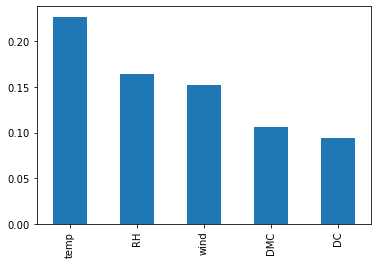

In [141]:
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

In [142]:
X.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain'],
      dtype='object')

In [143]:
X.drop(['month', 'day', 'FFMC','ISI','rain'],axis=1,inplace=True)

In [144]:
X

,DMC,DC,temp,RH,wind
0,26.2,94.3,8.2,51,6.7
1,35.4,669.1,18.0,33,0.9
2,43.7,686.9,14.6,33,1.3
3,33.3,77.5,8.3,97,4.0
4,51.3,102.2,11.4,99,1.8
...,...,...,...,...,...
512,56.7,665.6,27.8,32,2.7
513,56.7,665.6,21.9,71,5.8
514,56.7,665.6,21.2,70,6.7
515,146.0,614.7,25.6,42,4.0


In [145]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bagging_Regressor', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART_DecisionTree', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(y, predictions)
    mae = mean_absolute_error(predictions, y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.013838 (19.254547)
Ridge: 0.013838 (19.254492)
Lasso: 0.013733 (19.215728)
ElasticNet: 0.013756 (19.226041)
Bagging_Regressor: 0.811658 (8.029929)
RandomForest: 0.841349 (7.604964)
ExtraTreesRegressor: 0.997104 (0.627112)
KNN: 0.271509 (15.694870)
CART_DecisionTree: 0.997104 (0.627112)
SVM: 0.000504 (12.805751)


In [146]:
y=np.array(y).reshape(len(y),1)
sc=MinMaxScaler(feature_range=(0,1))
y=sc.fit_transform(y)

In [147]:
y

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


In [148]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=5, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

seed=7
np.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=600, batch_size=5, verbose=0)
kfold = KFold(n_splits=30)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.00 (0.01) MSE
